Upload creditcard.csv


Saving creditcard.csv to creditcard.csv
Dataset Loaded Successfully
     Time        V1        V2        V3        V4        V5        V6  \
0  121958  0.486036  0.101723 -0.815592 -1.721047 -0.002736 -0.843590   
1  146867 -1.547304  1.498012 -0.349863 -0.982416 -0.394599 -0.474763   
2  131932  1.082691 -0.312836  0.649581 -0.430415  0.396706  1.254656   
3  103694 -0.471125  1.030919 -0.342718  1.368189 -0.193658  1.796147   
4  119879 -0.093636 -0.288063  1.078426  0.901144 -0.085176 -1.264686   

         V7        V8        V9  ...       V21       V22       V23       V24  \
0  0.354177 -0.545922  1.117118  ...  0.088659  0.809815  0.139065  0.675980   
1  0.483706 -1.404541  0.599804  ... -2.018395  1.165325 -1.998137 -0.797603   
2  0.227148 -0.893522 -1.276280  ...  0.299506  0.014265 -0.239139 -1.432304   
3 -0.616184 -0.640656  0.447960  ...  0.610152 -0.232129  1.306864  0.490955   
4 -0.201492 -0.196552  1.047670  ... -0.459552 -0.070654 -1.066149  0.447087   

        V25 

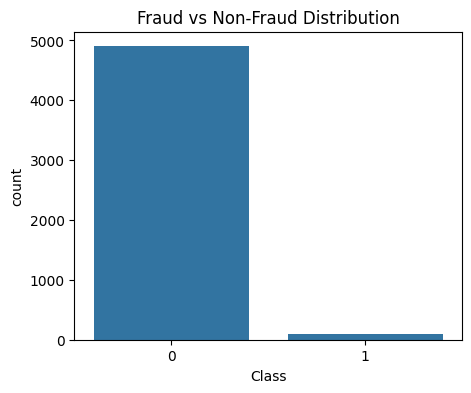

Train-Test Split Done

Logistic Regression Metrics:
{'Model': 'Logistic Regression', 'Precision': 0.01938610662358643, 'Recall': 0.4, 'F1 Score': 0.03697996918335902}


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Random Forest Metrics:
{'Model': 'Random Forest', 'Precision': 0.0, 'Recall': 0.0, 'F1 Score': 0.0}


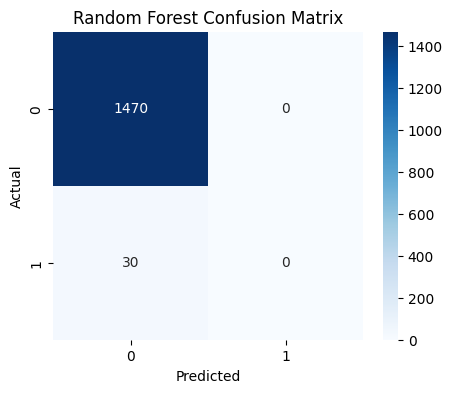

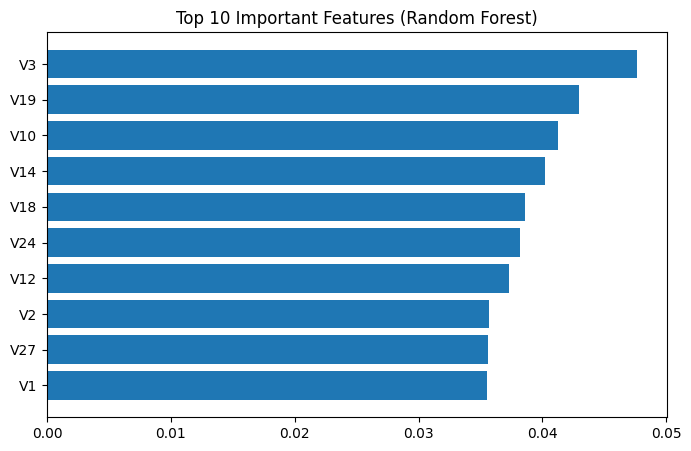


Model saved as random_forest_fraud_model.pkl

Model Comparison:
                 Model  Precision  Recall  F1 Score
0  Logistic Regression   0.019386     0.4   0.03698
1        Random Forest   0.000000     0.0   0.00000

✅ ALL TASKS COMPLETED SUCCESSFULLY
Outputs saved in /outputs and model saved in /models


In [5]:
# =========================================================
# CREDIT CARD FRAUD DETECTION – ONE COMPLETE PROGRAM
# Random Forest + Baseline Logistic Regression
# =========================================================

# 1. IMPORT LIBRARIES
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix
)

from google.colab import files

# ---------------------------------------------------------
# 2. CREATE REQUIRED FOLDERS
# ---------------------------------------------------------
os.makedirs("outputs", exist_ok=True)
os.makedirs("models", exist_ok=True)

# ---------------------------------------------------------
# 3. UPLOAD & LOAD DATASET
# ---------------------------------------------------------
print("Upload creditcard.csv")
uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])
print("Dataset Loaded Successfully")
print(df.head())

# ---------------------------------------------------------
# 4. CHECK CLASS IMBALANCE
# ---------------------------------------------------------
class_counts = df['Class'].value_counts()
fraud_ratio = (class_counts[1] / class_counts.sum()) * 100

print("\nClass Distribution:")
print(class_counts)
print(f"Fraud Percentage: {fraud_ratio:.4f}%")

plt.figure(figsize=(5,4))
sns.countplot(x='Class', data=df)
plt.title("Fraud vs Non-Fraud Distribution")
plt.savefig("outputs/class_distribution.png")
plt.show()

# ---------------------------------------------------------
# 5. FEATURE & TARGET SEPARATION
# ---------------------------------------------------------
X = df.drop("Class", axis=1)
y = df["Class"]

# ---------------------------------------------------------
# 6. STRATIFIED TRAIN-TEST SPLIT
# ---------------------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    stratify=y,
    random_state=42
)

print("Train-Test Split Done")

# ---------------------------------------------------------
# 7. BASELINE MODEL – LOGISTIC REGRESSION
# ---------------------------------------------------------
log_model = LogisticRegression(
    max_iter=1000,
    class_weight="balanced"
)

log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

log_metrics = {
    "Model": "Logistic Regression",
    "Precision": precision_score(y_test, y_pred_log),
    "Recall": recall_score(y_test, y_pred_log),
    "F1 Score": f1_score(y_test, y_pred_log)
}

pd.DataFrame([log_metrics]).to_csv(
    "outputs/metrics_logistic.csv",
    index=False
)

print("\nLogistic Regression Metrics:")
print(log_metrics)

# ---------------------------------------------------------
# 8. RANDOM FOREST MODEL (MAIN MODEL)
# ---------------------------------------------------------
rf_model = RandomForestClassifier(
    n_estimators=100,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

rf_metrics = {
    "Model": "Random Forest",
    "Precision": precision_score(y_test, y_pred_rf),
    "Recall": recall_score(y_test, y_pred_rf),
    "F1 Score": f1_score(y_test, y_pred_rf)
}

pd.DataFrame([rf_metrics]).to_csv(
    "outputs/metrics_random_forest.csv",
    index=False
)

print("\nRandom Forest Metrics:")
print(rf_metrics)

# ---------------------------------------------------------
# 9. CONFUSION MATRIX (RANDOM FOREST)
# ---------------------------------------------------------
cm = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig("outputs/confusion_matrix_rf.png")
plt.show()

# ---------------------------------------------------------
# 10. FEATURE IMPORTANCE PLOT
# ---------------------------------------------------------
importances = rf_model.feature_importances_
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(8,5))
plt.barh(range(len(indices)), importances[indices])
plt.yticks(range(len(indices)), X.columns[indices])
plt.title("Top 10 Important Features (Random Forest)")
plt.savefig("outputs/feature_importance.png")
plt.show()

# ---------------------------------------------------------
# 11. SAVE TRAINED MODEL
# ---------------------------------------------------------
joblib.dump(rf_model, "models/random_forest_fraud_model.pkl")
print("\nModel saved as random_forest_fraud_model.pkl")

# ---------------------------------------------------------
# 12. FINAL COMPARISON SUMMARY
# ---------------------------------------------------------
comparison = pd.DataFrame([log_metrics, rf_metrics])
comparison.to_csv("outputs/model_comparison.csv", index=False)

print("\nModel Comparison:")
print(comparison)

print("\n✅ ALL TASKS COMPLETED SUCCESSFULLY")
print("Outputs saved in /outputs and model saved in /models")
